In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
us = pd.read_csv('C:\\Users\\Maria\\Desktop\\CodeHub\\Jupyter\Project\\users_processed.csv')

In [32]:
us.columns

Index(['Unnamed: 0', 'user_id', 'birth_year', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts', 'North-East',
       'UK', 'West-South', 'brand', 'number_of_transactions',
       'completed_transactions', 'Perc_comp_transactions',
       'transactions_last_15_days', 'transactions_april_2019',
       'transactions_Jan_Feb_Mar_2019', 'total_amount_usd',
       'total_amount_usd_completed', 'Perc_compl_amount',
       'max_amount_usd_completed', 'min_amount_usd_completed',
       'mean_amount_usd_completed', 'EMAIL', 'PUSH', 'SMS', 'PUSH_sent',
       'EMAIL_sent', 'SMS_sent', 'Agricultural Services', 'Business Services',
       'Car Rental', 'Clothing Stores', 'Contracted Services',
       'Government Services', 'Lodging', 'Miscellaneous Stores',
       'Professional Services and Membership Organizations',
       'Retail Outlet Services', 'Transportation Services',
       'Travel and Entertainment', 'Utility Services', 'Africa', 'Americas',
       'A

## 1. Features of the Model

In [8]:
X = us[['birth_year', 'city', 'created_date', 'user_settings_crypto_unlocked',
        'num_contacts', 'North-East', 'UK', 'West-South', 'brand',
       'number_of_transactions', 'completed_transactions',
       'Perc_comp_transactions', 'transactions_last_15_days',
       'transactions_april_2019', 'transactions_Jan_Feb_Mar_2019',
       'total_amount_usd', 'total_amount_usd_completed', 'Perc_compl_amount',
       'max_amount_usd_completed', 'min_amount_usd_completed',
       'mean_amount_usd_completed', 'EMAIL', 'PUSH', 'SMS', 'PUSH_sent',
       'EMAIL_sent', 'SMS_sent']]

In [9]:
y = us['plan']

## 2. Recursive Feature elimination

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12435, 27), (3109, 27), (12435,), (3109,))

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

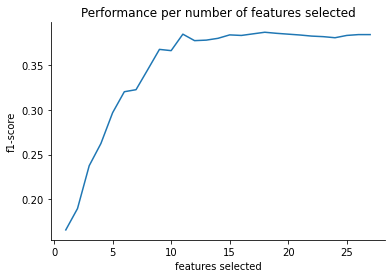

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import warnings

warnings.filterwarnings('ignore')

clf = LogisticRegression(solver='lbfgs', multi_class='auto')

rfecv = RFECV(estimator=clf, cv=5, scoring='f1')  
rfecv.fit(X_train, y_train)

#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

ax.set_title('Performance per number of features selected')
ax.set_xlabel('features selected')
ax.set_ylabel('f1-score')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [18]:
rfecv.support_

array([ True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False])

In [19]:
rfecv.grid_scores_

array([0.16548767, 0.18942839, 0.23749726, 0.26240662, 0.2969403 ,
       0.32048829, 0.32278254, 0.34526747, 0.3679859 , 0.36657261,
       0.38505686, 0.37779647, 0.37837123, 0.38039554, 0.38424087,
       0.38362775, 0.38542189, 0.3872138 , 0.38601587, 0.38506482,
       0.38412322, 0.38289612, 0.38226181, 0.38105136, 0.38363611,
       0.38457242, 0.38457242])

## 3. Machine Learning Model

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier

In [27]:
from imblearn.pipeline import Pipeline

sc = StandardScaler()  
rus = RandomUnderSampler()  
knn = MLPClassifier()

pipe = Pipeline([('scaler',sc),('sampler',rus),('classifier',knn)])

grid = {'classifier__hidden_layer_sizes' : [ (10,),(20,),(30), (50,),(30,10), (50, 20), (50, 10), (50, 30)],
        'classifier__batch_size' : [200,250,300],
        'classifier__activation' : ['logistic', 'relu'],
        'classifier__learning_rate_init' : [0.01, 0.002]}

gs = GridSearchCV(pipe, grid, cv=5, scoring='f1')
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('classifier', MLPClassifier())]),
             param_grid={'classifier__activation': ['logistic', 'relu'],
                         'classifier__batch_size': [200, 250, 300],
                         'classifier__hidden_layer_sizes': [(10,), (20,), 30,
                                                            (50,), (30, 10),
                                                            (50, 20), (50, 10),
                                                            (50, 30)],
                         'classifier__learning_rate_init': [0.01, 0.002]},
             scoring='f1')

In [28]:
gs.best_params_

{'classifier__activation': 'logistic',
 'classifier__batch_size': 250,
 'classifier__hidden_layer_sizes': (50, 10),
 'classifier__learning_rate_init': 0.002}

In [29]:
preds = gs.predict(X_test)    
f1_score(y_test,preds)

0.3931034482758621

In [30]:
print(accuracy_score(y_test,preds))
print('-----------------------------')
print(classification_report(y_test,preds))

0.8301704728208427
-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      2881
           1       0.27      0.75      0.39       228

    accuracy                           0.83      3109
   macro avg       0.62      0.79      0.65      3109
weighted avg       0.92      0.83      0.86      3109

